In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns


In [ ]:
df_data = pd.read_csv("nobel_prize_data.csv")

In [ ]:
df_data.describe()

In [ ]:
df_data.head()

In [ ]:
df_data.tail()

In [ ]:
df_data.shape


In [ ]:
df_data.isna().values.any()
df_data.isna().sum()
col_subset = ['year', 'category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

In [ ]:
df_data.duplicated().values.any()

In [ ]:
df_data.info()

In [ ]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])


In [ ]:
df_data.head()

In [ ]:
separated_values = df_data.prize_share.str.split("/", expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data["share_pct"] = numerator / denomenator
df_data.head()

In [ ]:
gender_counts = df_data.sex.value_counts()

gender_donut = px.pie(labels =gender_counts.index,
                      values=gender_counts.values,
                      names=gender_counts.index,
                      title = "Percentage of Male vs. Female Winners",
                     hole= 0.4)
gender_donut.update_traces(textposition="inside", textfont_size=15, textinfo="percent")
gender_donut.show()

In [ ]:
women = df_data[df_data.sex == "Female"].sort_values(by= "year")
women.head(3)

In [ ]:
df_data.full_name.duplicated().sum()

In [ ]:
is_winner = df_data.duplicated(subset=["full_name"], keep=False)
multiple_winners = df_data[is_winner]
multiple_winners

In [ ]:
df_data.category.unique()

In [ ]:
cat = df_data.category.value_counts()
fig = px.bar(cat.index, x=cat.index, y=cat.values, color_continuous_scale="Aggrnyl", title="Number of Prizes Awarded per Category")
fig.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
fig.show()

In [ ]:
df_data[df_data.category == "Economics"].sort_values(by="year")

In [ ]:
prize_mw = df_data.groupby(["category", "sex"], as_index=False).agg({"prize": pd.Series.count})
prize_mw.sort_values("prize", ascending=False, inplace=True)
fig = px.bar(x=prize_mw.category, y=prize_mw.prize, color=prize_mw.sex)
fig.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
fig.show()

In [ ]:
nr_prize = df_data.groupby("year").agg({"prize":pd.Series.count})
nr_prize

In [ ]:
rolled_nr_prize = nr_prize.rolling(window=5).mean()
rolled_nr_prize

In [ ]:
import numpy as np

plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)
           
ax=plt.gca()  # get current axis
ax.set_xlim(1900,2020)
ax.scatter(x=nr_prize.index, y=nr_prize.values,  color='dodgerblue', alpha= 0.7, s=100)
ax.plot(nr_prize.index, rolled_nr_prize.values, c="crimson", linewidth=3)
                
plt.show()

In [ ]:
df_data.head()

In [ ]:
prize_share = df_data.groupby("year").agg({"share_pct": pd.Series.mean})
prize_share

In [ ]:
rolling_share = prize_share.rolling(window=5).mean()
rolling_share


In [ ]:

plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)
           
ax=plt.gca()  # get current axis
ax.set_xlim(1900,2020)
ax.set_ylabel("Number of Prizes")
ax.scatter(x=nr_prize.index, y=nr_prize.values,  color='dodgerblue', alpha= 0.7, s=100)
ax.plot(nr_prize.index, rolled_nr_prize.values, c="crimson", linewidth=3)

ax2 = ax.twinx()
ax2.invert_yaxis()  #read labels from top to bottom
ax2.set_ylabel("Shared prizes in percentage")
ax2.plot(nr_prize.index, rolling_share.values, c="orange", linewidth=3)
                
plt.show()

In [ ]:
countries_ranking = df_data.groupby("birth_country_current", as_index=False).agg({"prize": pd.Series.count})
countries_ranking.sort_values(by="prize", inplace =True)
top20 = countries_ranking[-20:]

In [ ]:
fig = px.bar(top20, x="prize", y="birth_country_current", 
             orientation="h",
             title="Top 20 Countries by Number of Prizes",
             color="prize", color_continuous_scale=px.colors.sequential.Viridis,
             labels={
                     "prize": "Number of Prizes",
                     "birth_country_current": "Country"}
            )
# fig['layout']['yaxis']['autorange'] = "reversed"

fig.show()

In [ ]:
df_countries = df_data.groupby(["birth_country_current" ,"ISO"], as_index=False).agg({"prize": pd.Series.count}).sort_values("prize", ascending =False)


world_map = px.choropleth(df_countries, 
                          locations="ISO", 
                          color="prize", 
                          hover_name="birth_country_current",
                          color_continuous_scale = px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()


In [ ]:
category_country = df_data.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})
category_country.sort_values(by="prize", ascending=False, inplace=True)
merge_df = pd.merge(category_country, top20, on="birth_country_current")
merge_df.columns = ["birth_country_current", "category", "cat_prize", "total_prize"]  # cahnge column names
merge_df.sort_values(by="total_prize", inplace=True)


In [ ]:

fig = px.bar(x=merge_df.cat_prize, y=merge_df.birth_country_current, 
             orientation="h",
             title="Top 20 Countries by Number of Prizes and Category",
             color=merge_df.category, color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(xaxis_title="Number of Prizes",
                 yaxis_title="Country",
                 coloraxis_showscale=False)

fig.show()

In [ ]:
prize_by_year = df_data.groupby(["birth_country_current", "year"], as_index=False).count()
prize_by_year = prize_by_year.sort_values("year")[["year", "birth_country_current", "prize"]]

cumulative_prizes = prize_by_year.groupby(["birth_country_current", "year"]).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

cumulative_prizes

In [ ]:
dev = px.line(x=cumulative_prizes.year, y =cumulative_prizes.prize,
              color=cumulative_prizes.birth_country_current,
              hover_name=cumulative_prizes.birth_country_current
             )
dev.update_layout(xaxis_title="Year", yaxis_title="Number of Prizes")
dev.show()

In [ ]:
data_ranking= df_data.groupby("organization_name", as_index=False).agg({"prize": pd.Series.count}).sort_values(by="prize")
orga_ranking = data_ranking[-20:]

In [ ]:
fig3 = px.bar(orga_ranking, x="prize",
              y="organization_name",
              orientation="h",
              title= "Top 20 Research Institutions by Number of Prizes",
              color="prize", 
              color_continuous_scale=px.colors.sequential.Cividis)
fig3.update_layout(xaxis_title="Number of Prizes", yaxis_title="Insitution")
fig3.show()

In [ ]:
data_city_ranking= df_data.groupby("organization_city", as_index=False).agg({"prize": pd.Series.count}).sort_values(by="prize")
city_ranking = data_city_ranking[-20:]

fig_city = px.bar(city_ranking, x="prize",
              y="organization_city",
              orientation="h",
              title= "Top 20 Research Cities by Number of Prizes",
              color="prize", 
              color_continuous_scale=px.colors.sequential.Cividis)
fig_city.update_layout(xaxis_title="Number of Prizes", yaxis_title="Cities")
fig_city.show()

In [ ]:
data_birth_ranking= df_data.groupby("birth_city", as_index=False).agg({"prize": pd.Series.count}).sort_values(by="prize")
birth_ranking = data_birth_ranking[-20:]

fig_city = px.bar(birth_ranking, x="prize",
              y="birth_city",
              orientation="h",
              title= "Top 20 Research Cities by Number of Prizes",
              color="prize", 
              color_continuous_scale=px.colors.sequential.Plasma)
fig_city.update_layout(xaxis_title="Number of Prizes", yaxis_title="Cities")
fig_city.show()

In [ ]:
df_US = df_data[df_data.birth_country_current == "United States of America"]
df_NY = df_data[df_data.birth_city == "New York, NY"]
( df_NY.year.count() / df_US.year.count()) * 100

In [ ]:
data_ranking_final= df_data.groupby(["organization_name", "organization_city", "organization_country"], as_index=False).agg({"prize": pd.Series.count})


fig = px.sunburst(data_ranking_final, path=['organization_country', 'organization_city', 'organization_name'], values='prize',
                  color='organization_country',
                  color_continuous_scale='RdBu')
fig.show()


In [ ]:
df_data.head()

In [ ]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])

In [ ]:
birth_year = df_data["birth_date"].dt.year
df_data["winning_age"] = df_data["year"] - birth_year
df_data.head()

In [ ]:
df_data["winning_age"].max()

In [ ]:
df_data["winning_age"].min()
youngest = df_data[df_data.winning_age == 17]
youngest

In [ ]:
oldest = df_data[df_data.winning_age == 97]
oldest

In [ ]:
df_data["winning_age"].mean()

In [ ]:
df_data["winning_age"].quantile(0.75)

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_data, x="winning_age", bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()


In [ ]:
df_data["winning_age"].describe()

In [ ]:
display(df_data.nlargest(n=1, columns='winning_age'))


In [ ]:
display(df_data.nsmallest(n=1, columns='winning_age'))

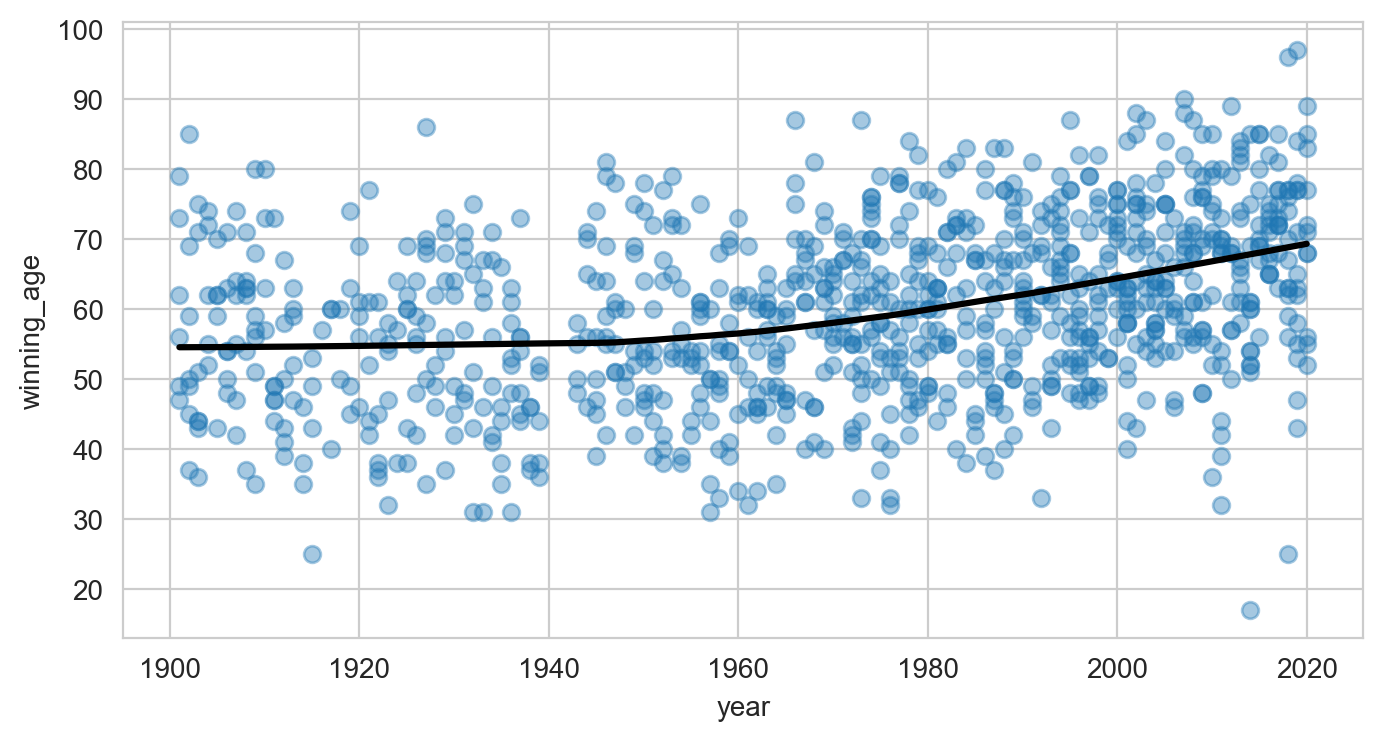

In [391]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data, x="year", y="winning_age",
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

    plt.show()

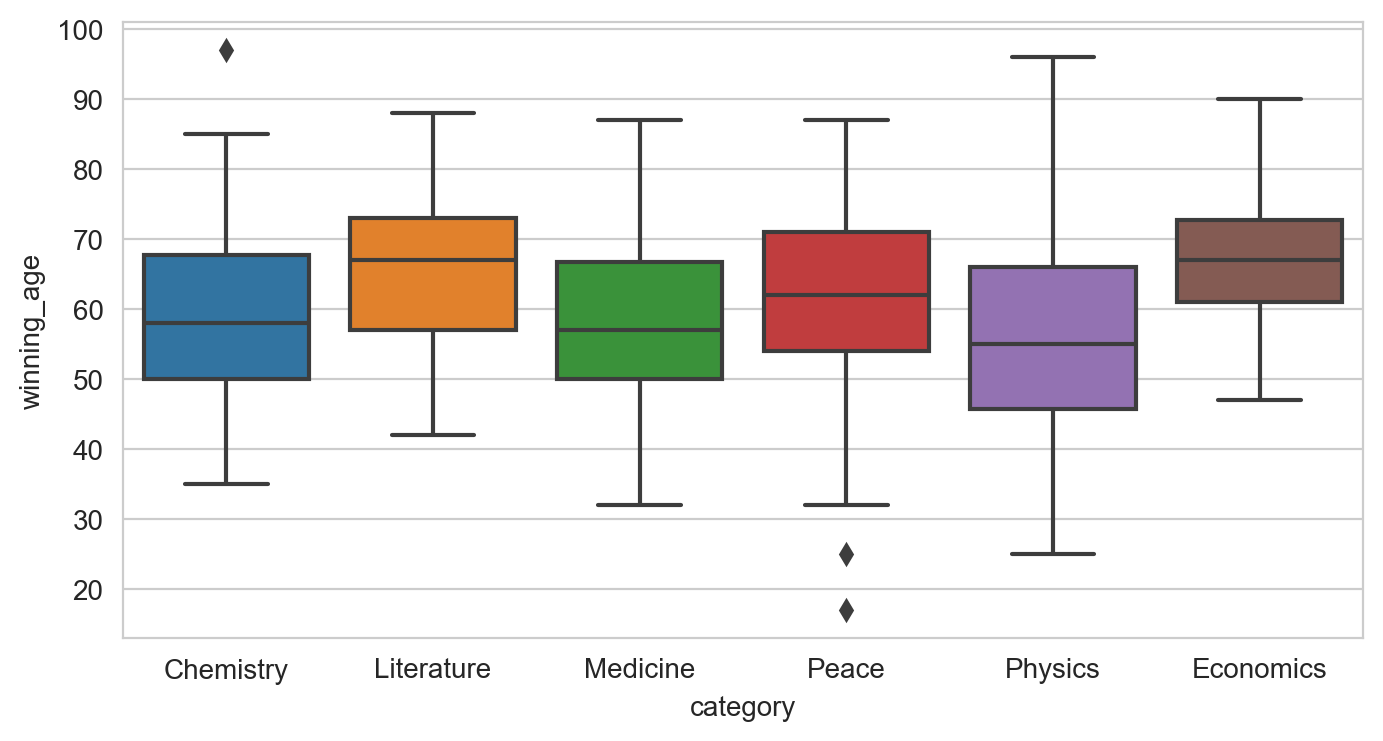

In [383]:
#df_data.groupby("category", as_index=False).agg({"winning_age": pd.Series.mean})

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(df_data, x="category",y="winning_age")
    plt.show()

<Figure size 1600x800 with 0 Axes>

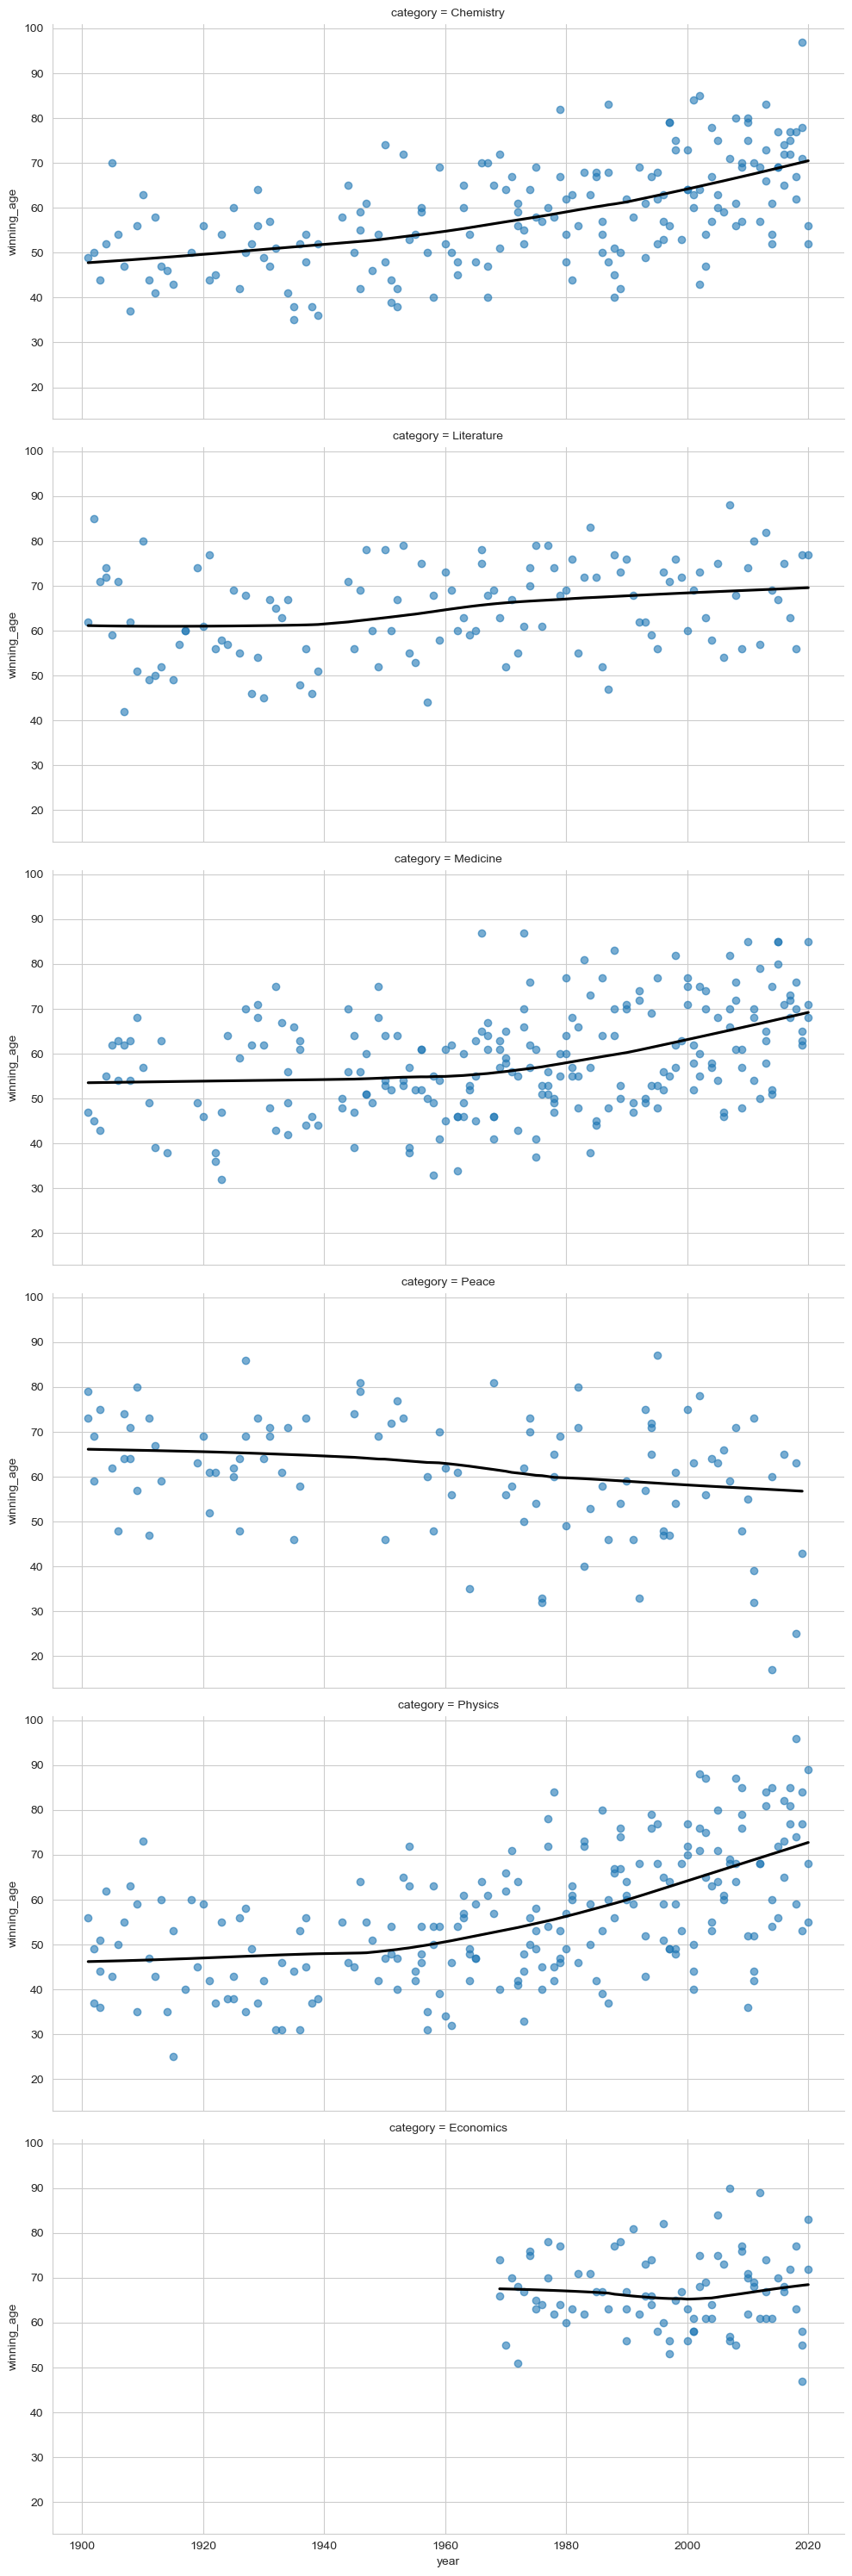

In [396]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data, x="year", y="winning_age", row="category", lowess=True,
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
    plt.show()



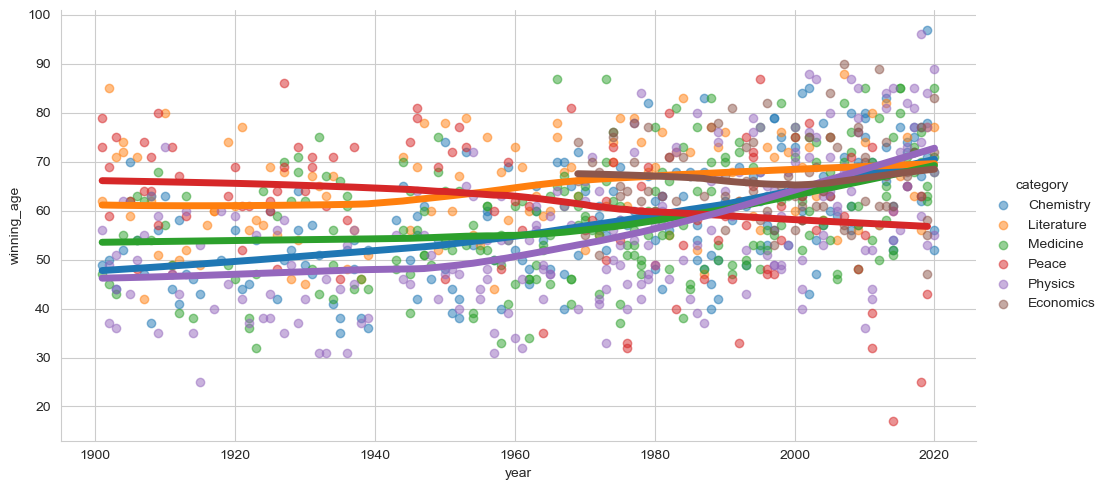

In [398]:
#plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data, x="year", y="winning_age", hue="category",
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
    plt.show()